Loading the dataset

In [2]:
import pandas as pd

df = pd.read_csv(
    "file:///C:/Users/Dell/OneDrive/Desktop/Notes/NOTES%20Sem4/PBL2/Models/DatasetCarbonPrediction.csv",
    engine='python',
    on_bad_lines='skip'
)

print(df.head())                 # Show first few rows

print(df.info())                          #info of each column

                 MAC  weekday       fecha_servidor          fecha_esp32  \
0  3C:61:05:12:96:30        4  2021-08-05 10:58:36  2021-08-05 10:58:36   
1  3C:61:05:12:96:30        4  2021-08-05 10:58:37  2021-08-05 10:58:37   
2  3C:61:05:12:96:30        4  2021-08-05 10:58:38  2021-08-05 10:58:38   
3  3C:61:05:12:96:30        4  2021-08-05 10:58:39  2021-08-05 10:58:39   
4  3C:61:05:12:96:30        4  2021-08-05 10:58:40  2021-08-05 10:58:40   

   voltaje  corriente  potencia  frecuencia  energia   fp  ESP32_temp  \
0    120.5       0.02       0.0        60.0   171.89  0.0       23.89   
1    120.5       0.02       0.0        59.9   171.89  0.0       24.44   
2    120.5       0.02       0.0        60.0   171.89  0.0       24.44   
3    120.5       0.02       0.0        60.0   171.89  0.0       24.44   
4    120.5       0.02       0.0        59.9   171.89  0.0       25.00   

   WORKSTATION_CPU  WORKSTATION_CPU_POWER  WORKSTATION_CPU_TEMP  \
0              0.0                    0.0  

Cleaning the dataset

In [6]:
df.columns = df.columns.str.strip().str.lower()    #.str: treats the column names as strings, allowing string operations.
                                                   #.strip(): removes any leading or trailing spaces from each column name.
                                                   #.lower(): converts all column names to lowercase.
df.rename(columns={
    'workstation_cpu_power': 'cpu_power',
    'workstation_gpu_power': 'gpu_power',
    'workstation_ram_power': 'ram_power',
}, inplace=True)                                 #inplace=True; changes directly applied to data frame

df['fecha_esp32'] = pd.to_datetime(df['fecha_esp32'], errors='coerce')    #converts the column to datetime format using pandas

numeric_cols = [
    'voltaje', 'corriente', 'potencia', 'frecuencia', 'energia', 'fp',
    'esp32_temp', 'workstation_cpu', 'cpu_power', 'workstation_cpu_temp',
    'workstation_gpu', 'gpu_power', 'workstation_gpu_temp',
    'workstation_ram', 'ram_power'
]                             #creating a list of column names that represents numerical data in dataset

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')   #converts values in the numeric_cols columns to numeric data types (like int or float)

print(df.info())

columns_to_drop = ['mac', 'fecha_servidor']         #Redundant timestamp (keeping 'fecha_esp32' instead)

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  #errors='ignore', if the column doesn't exist, pandas will skip it and won't raise an error

print(df.columns.tolist())   #displays columns in list form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178051 entries, 0 to 3178050
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   mac                   object        
 1   weekday               int64         
 2   fecha_servidor        object        
 3   fecha_esp32           datetime64[ns]
 4   voltaje               float64       
 5   corriente             float64       
 6   potencia              float64       
 7   frecuencia            float64       
 8   energia               float64       
 9   fp                    float64       
 10  esp32_temp            float64       
 11  workstation_cpu       float64       
 12  cpu_power             float64       
 13  workstation_cpu_temp  int64         
 14  workstation_gpu       int64         
 15  gpu_power             int64         
 16  workstation_gpu_temp  float64       
 17  workstation_ram       float64       
 18  ram_power             float64       
dtype

Feature Engineering
Create new features or modify existing ones to help the model.
Extract date/time features (hour, day, month).
Calculate rolling averages or lags if needed.

['weekday', 'fecha_esp32', 'voltaje', 'corriente', 'potencia', 'frecuencia', 'energia', 'fp', 'esp32_temp', 'workstation_cpu', 'cpu_power', 'workstation_cpu_temp', 'workstation_gpu', 'gpu_power', 'workstation_gpu_temp', 'workstation_ram', 'ram_power', 'hour', 'day', 'month', 'dayofweek', 'is_weekend', 'cpu_power_rolling_mean_1min', 'gpu_power_rolling_mean_1min', 'ram_power_rolling_mean_1min', 'potencia_rolling_mean_1min', 'cpu_power_lag_1', 'cpu_power_diff', 'gpu_power_lag_1', 'gpu_power_diff', 'ram_power_lag_1', 'ram_power_diff', 'potencia_lag_1', 'potencia_diff', 'cpu_util_ratio', 'gpu_util_ratio']
          fecha_esp32  hour  day  month  dayofweek  is_weekend
0 2021-08-05 10:58:36    10    5      8          3           0
1 2021-08-05 10:58:37    10    5      8          3           0
2 2021-08-05 10:58:38    10    5      8          3           0
3 2021-08-05 10:58:39    10    5      8          3           0
4 2021-08-05 10:58:40    10    5      8          3           0
   cpu_power  

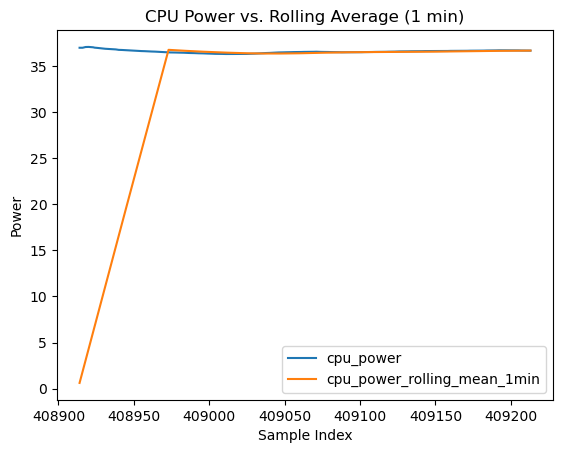

,weekday,fecha_esp32,voltaje,corriente,potencia,frecuencia,energia,fp,esp32_temp,workstation_cpu,...,cpu_power_lag_1,cpu_power_diff,gpu_power_lag_1,gpu_power_diff,ram_power_lag_1,ram_power_diff,potencia_lag_1,potencia_diff,cpu_util_ratio,gpu_util_ratio
0,4,2021-08-05 10:58:36,120.5,0.02,0.0,60.0,171.89,0.0,23.89,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,4,2021-08-05 10:58:37,120.5,0.02,0.0,59.9,171.89,0.0,24.44,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,2021-08-05 10:58:38,120.5,0.02,0.0,60.0,171.89,0.0,24.44,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2021-08-05 10:58:39,120.5,0.02,0.0,60.0,171.89,0.0,24.44,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-08-05 10:58:40,120.5,0.02,0.0,59.9,171.89,0.0,25.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4,2021-08-05 10:58:41,120.5,0.02,0.0,60.0,171.89,0.0,25.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4,2021-08-05 10:58:42,120.5,0.02,0.0,60.0,171.89,0.0,25.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4,2021-08-05 10:58:43,120.5,0.02,0.0,60.0,171.89,0.0,25.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4,2021-08-05 10:58:44,120.5,0.02,0.0,60.0,171.89,0.0,25.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4,2021-08-05 10:58:45,120.5,0.02,0.0,60.0,171.89,0.0,25.56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#extract date/time features from fecha_esp32
df['hour'] = df['fecha_esp32'].dt.hour           #extracts the hour(0–23) from the datetime & stores it in column 'hour'
df['day'] = df['fecha_esp32'].dt.day         #extracts the day of the month (1–31)
df['month'] = df['fecha_esp32'].dt.month      #the month (1–12)
df['dayofweek'] = df['fecha_esp32'].dt.dayofweek   #the day of the week as a number(Mon=0, Sun=6)
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)    #it checks if the day of the week is Sat(5) or Sun(6)

#Create rolling averages to smooth noisy data
rolling_cols = ['cpu_power', 'gpu_power', 'ram_power', 'potencia']

for col in rolling_cols:       #loops through each column in the list rolling_cols
    df[f'{col}_rolling_mean_1min'] = df[col].rolling(window=60, min_periods=1).mean()

#Create lag features to detect change patterns over time
for col in rolling_cols:
    df[f'{col}_lag_1'] = df[col].shift(1)
    df[f'{col}_diff'] = df[col] - df[f'{col}_lag_1']

#power usage ratios or two new derived features created
df['cpu_util_ratio'] = df['cpu_power']/(df['cpu_power'] + df['gpu_power'] + 1e-6)   #ratio of CPU power (cpu_power) to the total power consumption (CPU + GPU)
df['gpu_util_ratio'] = df['gpu_power']/(df['cpu_power'] + df['gpu_power'] + 1e-6)   #ratio of GPU power (gpu_power) to the total power

print(df.columns.tolist())

print(df[['fecha_esp32', 'hour', 'day', 'month', 'dayofweek', 'is_weekend']].head())
print(df[['cpu_power', 'cpu_power_rolling_mean_1min', 'cpu_power_diff']].head(10))

print(df[['cpu_power_diff', 'gpu_power_diff']].isna().sum())

import matplotlib.pyplot as plt

non_zero_df = df[df['cpu_power'] > 0]   #filter rows where cpu_power is greater than 0
###########################
# Plot the first 300 valid samples
non_zero_df[['cpu_power', 'cpu_power_rolling_mean_1min']].head(300).plot()
plt.title("CPU Power vs. Rolling Average (1 min)")
plt.xlabel("Sample Index")
plt.ylabel("Power")
plt.legend()
plt.show()

df.head(10)


Split the data

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['energia_kWh'] = df['energia'] / 1000          #convert 'energia' to 'energia_kWh'

df['fecha_esp32'] = pd.to_datetime(df['fecha_esp32'])    #extract time-based features from 'fecha_esp32'
df['hour'] = df['fecha_esp32'].dt.hour
df['day_of_week'] = df['fecha_esp32'].dt.dayofweek                   ########repeated code#########

#adding a 'carbon_emissions' column based on 'energia_kWh' and a given carbon intensity(e.g., 0.4 kgCO2/kWh)
carbon_intensity = 0.4        #example value, replace with actual grid-specific value
df['carbon_emissions'] = df['energia_kWh'] * carbon_intensity

#define features (x axis) and target (y axis)
features = ['potencia', 'cpu_util_ratio', 'gpu_util_ratio', 'energia_kWh', 'hour', 'day_of_week']
target = 'carbon_emissions'

train = df[:int(0.8 * len(df))]
test = df[int(0.8 * len(df)):]            #training and testing sets

#training and testing data
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#output the shapes to verify the split
print(f"Training data size: {X_train.shape}, Testing data size: {X_test.shape}")


Training data size: (2542440, 6), Testing data size: (635611, 6)


Train the model

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

Predictions

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
#making predictions
y_pred = model.predict(X_test)
#evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.545559732660361e-05
R^2 Score: 0.9947959946802193


 Plot Predictions and Feature Importance

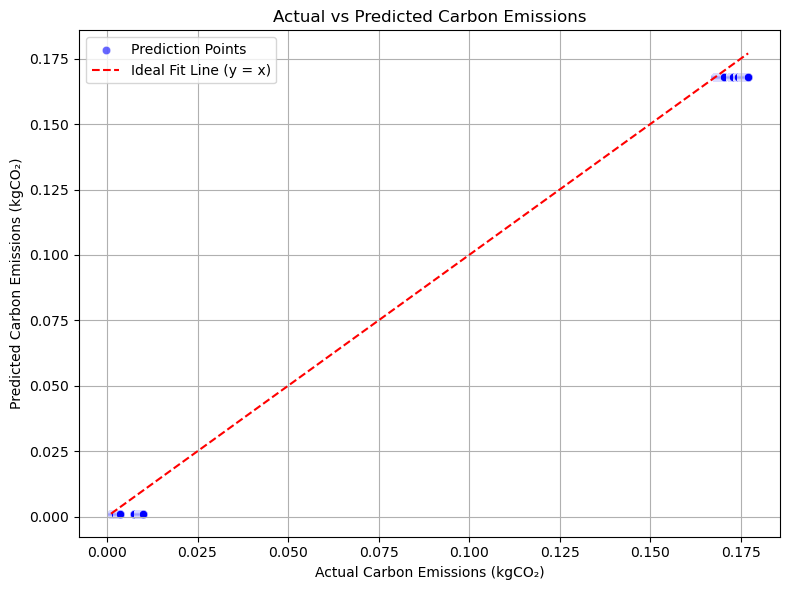

NameError: name 'importances' is not defined

<Figure size 800x600 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot 1: Actual vs Predicted Carbon Emissions
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Prediction Points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit Line (y = x)")

plt.xlabel("Actual Carbon Emissions (kgCO₂)")
plt.ylabel("Predicted Carbon Emissions (kgCO₂)")
plt.title("Actual vs Predicted Carbon Emissions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#plot 2: Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names, hue=feature_names, palette="viridis", dodge=False, legend=False)

plt.title("Feature Importance in Predicting Carbon Emissions")
plt.xlabel("Importance (Gini Importance from Random Forest)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



Accuracy of the model

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
############################
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# New:
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

accuracy = 100 * (1 - (np.mean(np.abs(y_test - y_pred)) / np.mean(y_test)))
print(f"Approximate Accuracy: {accuracy:.2f}%")



R² Score: 0.9948
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0060
Mean Absolute Error (MAE): 0.0049
Approximate Accuracy: 95.11%


.

we didn’t originally have carbon emissions as a column — calculated it using:
df['carbon_emissions'] = df['energia_kWh'] * carbon_intensity
Once you had the carbon emissions as a target, you taught a model to predict those emissions using various input features.
These inputs tell the model:
potencia: Real-time power usage (Watts)
cpu_util_ratio: How busy the CPU is (0 to 1)
gpu_util_ratio: How busy the GPU is (0 to 1)
energia_kWh: Total energy consumed so far
hour: What time it is (energy usage patterns change over time)
day_of_week: Could reflect weekday/weekend patterns
Then the model learns how these inputs relate to the carbon emissions based on historical data.
You trained the RandomForestRegressor, which is an ensemble of decision trees:
It looks at the training data and builds a lot of small decision trees.
Each tree learns some patterns between your features and the carbon emissions.
When you give new data, it averages predictions across all trees.
y_pred = model.predict(X_test)

In [35]:
import pandas as pd
#example test (hypothetical records)
new_data = pd.DataFrame({
    'potencia': [100.0, 150.0, 80.0],            # Power usage in watts
    'cpu_util_ratio': [0.6, 0.8, 0.3],           # CPU utilization ratio
    'gpu_util_ratio': [0.5, 0.7, 0.2],           # GPU utilization ratio
    'energia_kWh': [1.2, 2.5, 0.9],              # Energy in kilowatt-hours
    'hour': [14, 3, 22],                         # Hour of the day
    'day_of_week': [2, 6, 0]                     # 0=Monday, ..., 6=Sunday
})

predicted_emissions = model.predict(new_data)
# Combine predictions with the inputs for clarity
new_data['predicted_carbon_emissions'] = predicted_emissions
print(new_data)


   potencia  cpu_util_ratio  gpu_util_ratio  energia_kWh  hour  day_of_week  \
0     100.0             0.6             0.5          1.2    14            2   
1     150.0             0.8             0.7          2.5     3            6   
2      80.0             0.3             0.2          0.9    22            0   

   predicted_carbon_emissions  
0                    0.167934  
1                    0.167934  
2                    0.167934  


In [27]:
import pandas as pd
new_data = pd.DataFrame({
    'potencia': [5.0, 300.0, 200.0, 400.0],            # Extremely low to very high power
    'cpu_util_ratio': [0.0, 1.0, 0.95, 0.1],           # Idle to full CPU usage
    'gpu_util_ratio': [0.0, 1.0, 0.85, 0.05],          # Idle to full GPU usage
    'energia_kWh': [0.01, 10.0, 7.5, 12.0],            # Tiny energy use to large
    'hour': [0, 23, 12, 15],                           # Different hours of the day
    'day_of_week': [0, 6, 3, 5]                        # Different days (Mon–Sun)
})
# Predict emissions for extreme values
new_predictions = model.predict(new_data)

# Combine predictions with inputs
new_data['predicted_carbon_emissions'] = new_predictions

# Display results
print(new_data)


   potencia  cpu_util_ratio  gpu_util_ratio  energia_kWh  hour  day_of_week  \
0       5.0            0.00            0.00         0.01     0            0   
1     300.0            1.00            1.00        10.00    23            6   
2     200.0            0.95            0.85         7.50    12            3   
3     400.0            0.10            0.05        12.00    15            5   

   predicted_carbon_emissions  
0                    0.001110  
1                    0.167934  
2                    0.167934  
3                    0.167934  
